In [1]:
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [2]:
dateparse = lambda x: datetime.datetime.strptime(x, '%y.%d.%m')

In [3]:
df = pd.read_csv('youtubesenttitle.csv', encoding='utf-8', encoding_errors='ignore', parse_dates=['trending_date'], date_parser=dateparse)

In [4]:
df

,category_id,category_title,country_code,video_id,trending_date,title,channel_title,publish_time,tags,views,...,comments_disabled,ratings_disabled,video_error_or_removed,description,clean_title,title.wc,title.polarity,title.pos.words,title.neg.words,title.text.var
0,1,Film & Animation,CA,X2HfBoQeDW4,2017-12-11,Film Theory: How Luke will DIE (Star Wars: The...,The Film Theorists,2017-12-07T21:05:16Z,star wars|star wars trailer|the last jedi|star...,1593715,...,False,False,False,SUBSCRIBE for More Film Theories! ► http://bit...,Film Theory How Luke will DIE Star Wars The...,13,-0.277350,NaN,NaN,Film Theory How Luke will DIE Star Wars The...
1,1,Film & Animation,CA,7hws55huP_A,2018-06-07,مسلسل الخاوة الجزء الثاني - الحلقة 21 Feuillet...,الخاوة ـ القناة الرسمية,2018-06-06T23:00:00Z,Yasmine Amari|The voice|Mohamed Reghis|Cheb Ne...,278600,...,False,False,False,Si la première saison tournait autour d’un vie...,21 Feuillet...,5,0.000000,NaN,NaN,21 Feuillet...
2,1,Film & Animation,CA,ZHbT3LWwsQ0,2018-06-13,Film Theory: How To SAVE Jurassic Park (Jurass...,The Film Theorists,2018-06-12T18:09:35Z,Jurassic|jurassic world|jurassic park|jurassic...,1297543,...,False,False,False,Watch Us Make A Jurassic Fossil Cake! ► https:...,Film Theory How To SAVE Jurassic Park Jurass...,9,0.000000,NaN,NaN,Film Theory How To SAVE Jurassic Park Jurass...
3,1,Film & Animation,CA,QbisKfwf6QY,2018-01-26,The Flash 4x11 No one Can Bully Barry Even In ...,Celeb Interview,2018-01-24T12:41:19Z,The Flash Episode 4x11|The Flash Episode 4x12|...,1829800,...,False,False,False,The Flash 4x11 No one Can Bully Barry Even In ...,The Flash 4x11 No one Can Bully Barry Even In ...,15,0.000000,NaN,NaN,The Flash 4x11 No one Can Bully Barry Even In ...
4,1,Film & Animation,CA,FyZMnhUtLfE,2017-11-14,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,2017-11-12T16:00:01Z,電視劇|大陸電視劇|猎场|职场|商战|爱情|都市|胡歌|陈龙|孙红雷|张嘉译|祖峰|李强|胡...,158815,...,False,False,False,Thanks for watching the drama! Help more peopl...,Game Of Hunting 12 TV,4,0.000000,NaN,NaN,Game Of Hunting 12 TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360657,43,Shows,US,V6ElE2xs48c,2018-05-20,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10T21:01:22Z,bleacher report|br|nba|Stan Van Gundy|Jeff Van...,1151096,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Game of Zones S5 E5 The Isle of Van Gundy,10,0.000000,NaN,NaN,Game of Zones S5 E5 The Isle of Van Gundy
360658,43,Shows,US,Q1CFfU2gXHw,2018-01-27,Apple HomePod: Everything to know before you b...,CNET,2018-01-24T20:08:16Z,Apple|Homepod|smart home|Google Home|Amazon Ec...,52255,...,False,False,False,We'll break down all the new Apple HomePod det...,Apple HomePod Everything to know before you b...,10,0.000000,NaN,NaN,Apple HomePod Everything to know before you b...
360659,43,Shows,US,Q1CFfU2gXHw,2018-01-30,Apple HomePod: Everything to know before you b...,CNET,2018-01-24T20:08:16Z,Apple|Homepod|smart home|Google Home|Amazon Ec...,72607,...,False,False,False,We'll break down all the new Apple HomePod det...,Apple HomePod Everything to know before you b...,10,0.000000,NaN,NaN,Apple HomePod Everything to know before you b...
360660,43,Shows,US,Q1CFfU2gXHw,2018-01-29,Apple HomePod: Everything to know before you b...,CNET,2018-01-24T20:08:16Z,Apple|Homepod|smart home|Google Home|Amazon Ec...,66284,...,False,False,False,We'll break down all the new Apple HomePod det...,Apple HomePod Everything to know before you b...,10,0.000000,NaN,NaN,Apple HomePod Everything to know before you b...


In [5]:
df_gb = df[df['country_code'] == 'GB']
df_gb = df_gb.reset_index(drop=True)
df_us = df[df['country_code'] == 'US']
df_us = df_us.reset_index(drop=True)

In [6]:
def date_to_weekday(d):
    d = d.date()
    d = d.weekday()
    d = calendar.day_name[d]
    return d

In [7]:
df_gb['weekday'] = ''
df_gb['weekday'] = df_gb.apply(lambda x: date_to_weekday(x['trending_date']), axis=1)
df_gb['weekday']

0         Thursday
1           Friday
2         Saturday
3        Wednesday
4         Thursday
           ...    
38650     Thursday
38651      Tuesday
38652       Monday
38653      Tuesday
38654       Friday
Name: weekday, Length: 38655, dtype: object

In [8]:
df_us['weekday'] = ''
df_us['weekday'] = df_us.apply(lambda x: date_to_weekday(x['trending_date']), axis=1)

<AxesSubplot:>

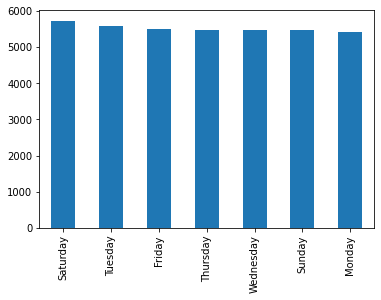

In [9]:
fig, ax = plt.subplots()
df_gb['weekday'].value_counts().plot(ax=ax, kind='bar')

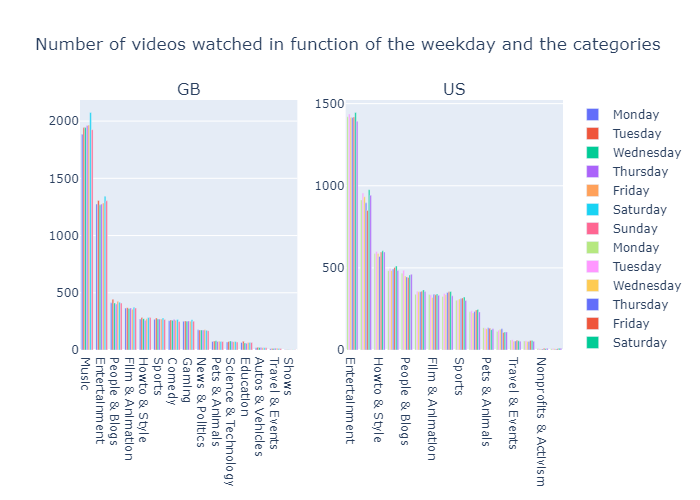

In [10]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("GB", "US"))

fig.add_trace(go.Bar(name = "Monday",y=df_gb[df_gb['weekday'] == 'Monday']["category_title"].value_counts(
), x=df_gb[df_gb['weekday'] == 'Monday']["category_title"].value_counts().index),row=1, col=1)

fig.add_trace(go.Bar(name = "Tuesday",y=df_gb[df_gb['weekday'] == 'Tuesday']["category_title"].value_counts(
), x=df_gb[df_gb['weekday'] == 'Tuesday']["category_title"].value_counts().index),row=1, col=1)

fig.add_trace(go.Bar(name = "Wednesday",y=df_gb[df_gb['weekday'] == 'Wednesday']["category_title"].value_counts(
), x=df_gb[df_gb['weekday'] == 'Wednesday']["category_title"].value_counts().index),row=1, col=1)

fig.add_trace(go.Bar(name = "Thursday",y=df_gb[df_gb['weekday'] == 'Thursday']["category_title"].value_counts(
), x=df_gb[df_gb['weekday'] == 'Thursday']["category_title"].value_counts().index),row=1, col=1)

fig.add_trace(go.Bar(name = "Friday",y=df_gb[df_gb['weekday'] == 'Friday']["category_title"].value_counts(
), x=df_gb[df_gb['weekday'] == 'Friday']["category_title"].value_counts().index),row=1, col=1)

fig.add_trace(go.Bar(name = "Saturday",y=df_gb[df_gb['weekday'] == 'Saturday']["category_title"].value_counts(
), x=df_gb[df_gb['weekday'] == 'Saturday']["category_title"].value_counts().index),row=1, col=1)

fig.add_trace(go.Bar(name = "Sunday",y=df_gb[df_gb['weekday'] == 'Sunday']["category_title"].value_counts(
), x=df_gb[df_gb['weekday'] == 'Sunday']["category_title"].value_counts().index),row=1, col=1)

fig.add_trace(go.Bar(name = "Monday",y=df_us[df_us['weekday'] == 'Monday']["category_title"].value_counts(
), x=df_us[df_us['weekday'] == 'Monday']["category_title"].value_counts().index),row=1, col=2)

fig.add_trace(go.Bar(name = "Tuesday",y=df_us[df_us['weekday'] == 'Tuesday']["category_title"].value_counts(
), x=df_us[df_us['weekday'] == 'Tuesday']["category_title"].value_counts().index),row=1, col=2)

fig.add_trace(go.Bar(name = "Wednesday",y=df_us[df_us['weekday'] == 'Wednesday']["category_title"].value_counts(
), x=df_us[df_us['weekday'] == 'Wednesday']["category_title"].value_counts().index),row=1, col=2)

fig.add_trace(go.Bar(name = "Thursday",y=df_us[df_us['weekday'] == 'Thursday']["category_title"].value_counts(
), x=df_us[df_us['weekday'] == 'Thursday']["category_title"].value_counts().index),row=1, col=2)

fig.add_trace(go.Bar(name = "Friday",y=df_us[df_us['weekday'] == 'Friday']["category_title"].value_counts(
), x=df_us[df_us['weekday'] == 'Friday']["category_title"].value_counts().index),row=1, col=2)

fig.add_trace(go.Bar(name = "Saturday",y=df_us[df_us['weekday'] == 'Saturday']["category_title"].value_counts(
), x=df_us[df_us['weekday'] == 'Saturday']["category_title"].value_counts().index),row=1, col=2)

fig.add_trace(go.Bar(name = "Sunday",y=df_us[df_us['weekday'] == 'Sunday']["category_title"].value_counts(
), x=df_us[df_us['weekday'] == 'Sunday']["category_title"].value_counts().index),row=1, col=2)

fig.update(layout_title_text='Number of videos watched in function of the weekday and the categories',
           layout_showlegend=True)
fig = go.Figure(fig)

fig.show(renderer="png")

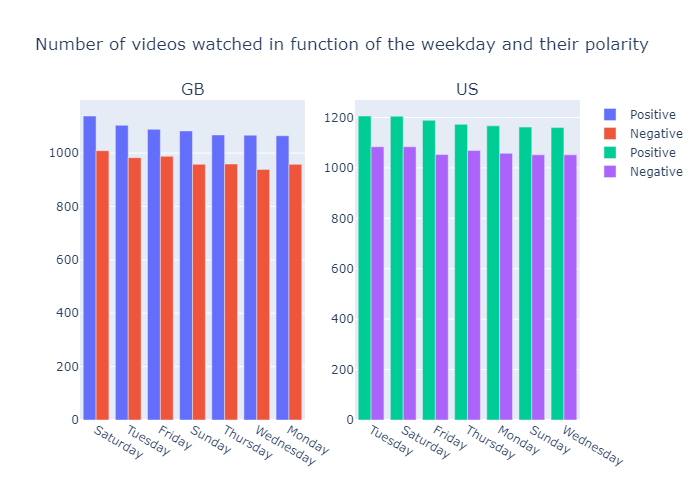

In [11]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("GB", "US"))

fig.add_trace(go.Bar(name = "Positive",y=df_gb[df_gb["title.polarity"] > 0]["weekday"].value_counts(
), x=df_gb[df_gb["title.polarity"] > 0]["weekday"].value_counts().index),row=1, col=1)

fig.add_trace(go.Bar(name = "Negative",y=df_gb[df_gb["title.polarity"] < 0]["weekday"].value_counts(
), x=df_gb[df_gb["title.polarity"] < 0]["weekday"].value_counts().index),row=1, col=1)

fig.add_trace(go.Bar(name = "Positive",y=df_us[df_us["title.polarity"] > 0]["weekday"].value_counts(
), x=df_us[df_us["title.polarity"] > 0]["weekday"].value_counts().index),row=1, col=2)

fig.add_trace(go.Bar(name = "Negative",y=df_us[df_us["title.polarity"] < 0]["weekday"].value_counts(
), x=df_us[df_us["title.polarity"] < 0]["weekday"].value_counts().index),row=1, col=2)

fig.update(layout_title_text='Number of videos watched in function of the weekday and their polarity',
           layout_showlegend=True)
fig = go.Figure(fig)
fig.show(renderer="png")

In [12]:
x = df['country_code']
condlist = [x == 'CA', x == 'DE', x == 'FR', x == 'GB', x == 'IN', x == 'JP', x == 'KR', x == 'MX', x == 'RU', x == 'US']
choicelist_HDI = [0.929, 0.947, 0.901, 0.932, 0.645, 0.919, 0.916, 0.779, 0.824, 0.926]
choicelist_IHDI = [0.848, 0.869, 0.820, 0.856, 0.475, 0.843, 0.815, 0.613, 0.740, 0.808]
choicelist_happiness = [7.103, 7.155, 6.69, 7.064, 3.819, 5.94, 5.845, 6.317, 5.477, 6.951]
df['HDI'] = np.select(condlist, choicelist_HDI)
df['IHDI'] = np.select(condlist,choicelist_IHDI)
df['happiness'] = np.select(condlist,choicelist_happiness)

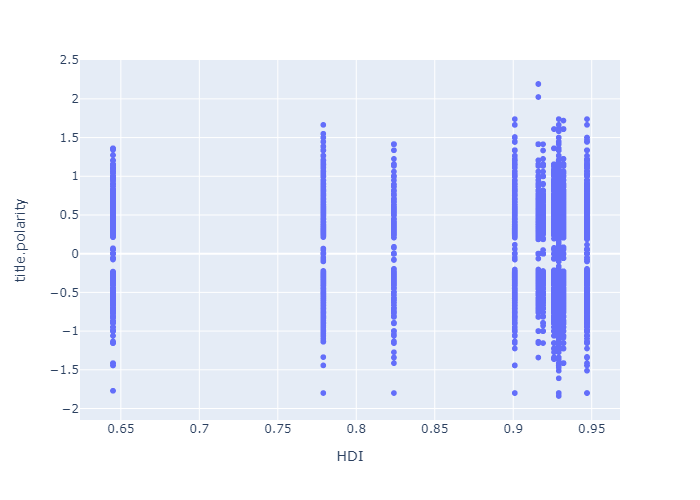

In [13]:
fig = px.scatter(df, y="title.polarity", x="HDI")
fig.show(renderer="png")

In [14]:
df_by_country_mean = df[df['title.polarity'] != 0].groupby('country_code').mean(numeric_only=True)
df_by_country_max = df[df['title.polarity'] != 0].groupby('country_code').max(numeric_only=True)
df_by_country_min = df[df['title.polarity'] != 0].groupby('country_code').min(numeric_only=True)
df_by_country_mean.sort_values(by='HDI',inplace=True)
df_by_country_max.sort_values(by='IHDI',inplace=True)
df_by_country_min.sort_values(by='happiness',inplace=True)
df_by_country_mean

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title.wc,title.polarity,title.pos.words,title.neg.words,HDI,IHDI,happiness
country_code,,,,,,,,,,,,,,,
IN,22.244935,1.016728e+06,26551.102832,1347.046183,2800.931829,0.038886,0.029189,0.000000,7.856265,0.042633,NaN,NaN,0.645,0.475,3.819
MX,19.741339,6.650763e+05,29625.974941,1254.787756,3534.728557,0.007904,0.010427,0.000673,9.754120,-0.024432,NaN,NaN,0.779,0.613,6.317
RU,20.484344,2.023428e+05,10360.613267,1332.716013,1402.623573,0.024322,0.023716,0.000000,0.282882,0.126093,NaN,NaN,0.824,0.740,5.477
FR,20.197145,5.502590e+05,20829.845101,950.611481,2165.641600,0.015744,0.014668,0.000000,6.913554,0.009402,NaN,NaN,0.901,0.820,6.690
KR,21.060924,3.680567e+05,9130.955475,333.810221,1531.968632,0.016876,0.034228,0.000715,0.647185,0.415986,NaN,NaN,0.916,0.815,5.845
JP,20.062228,2.185618e+05,7224.078057,320.096665,993.204809,0.056307,0.060053,0.000483,0.874577,0.194445,NaN,NaN,0.919,0.843,5.940
US,19.913077,2.581690e+06,80184.193072,4033.974494,8976.352072,0.016433,0.004378,0.000444,8.590381,0.020340,NaN,NaN,0.926,0.808,6.951
CA,20.867803,1.104569e+06,36644.547428,1751.519821,4651.026310,0.015219,0.007669,0.000118,8.351994,-0.030628,NaN,NaN,0.929,0.848,7.103
GB,16.639620,6.792588e+06,147430.595468,8603.865822,14544.277104,0.018253,0.005442,0.003651,8.710360,0.031559,NaN,NaN,0.932,0.856,7.064


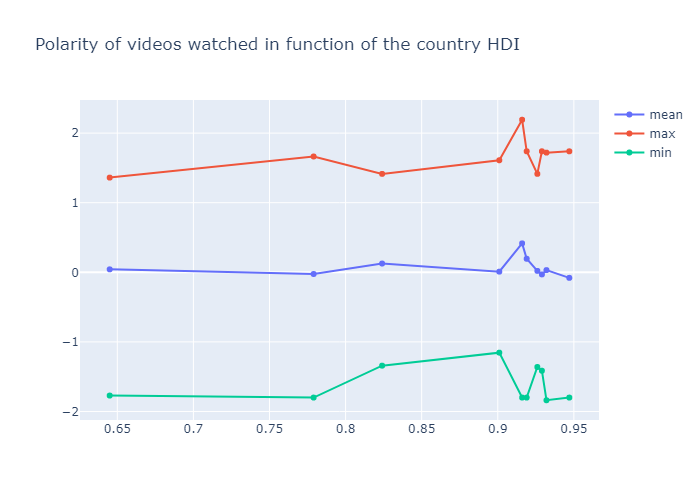

In [15]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=df_by_country_mean['title.polarity'], x=df_by_country_mean['HDI'],
                    mode='lines+markers',
                    name='mean'))
fig.add_trace(go.Scatter(y=df_by_country_max['title.polarity'], x=df_by_country_mean['HDI'],
                    mode='lines+markers',
                    name='max'))
fig.add_trace(go.Scatter(y=df_by_country_min['title.polarity'], x=df_by_country_mean['HDI'],
                    mode='lines+markers',
                    name='min'))

fig.update(layout_title_text='Polarity of videos watched in function of the country HDI',
           layout_showlegend=True)
fig.show(renderer="png")

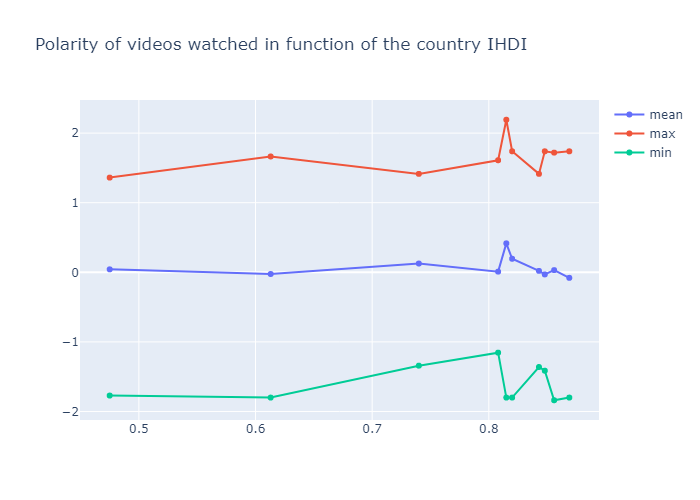

In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=df_by_country_mean['title.polarity'], x=df_by_country_max['IHDI'],
                    mode='lines+markers',
                    name='mean'))
fig.add_trace(go.Scatter(y=df_by_country_max['title.polarity'], x=df_by_country_max['IHDI'],
                    mode='lines+markers',
                    name='max'))
fig.add_trace(go.Scatter(y=df_by_country_min['title.polarity'], x=df_by_country_max['IHDI'],
                    mode='lines+markers',
                    name='min'))

fig.update(layout_title_text='Polarity of videos watched in function of the country IHDI',
           layout_showlegend=True)
fig.show(renderer="png")

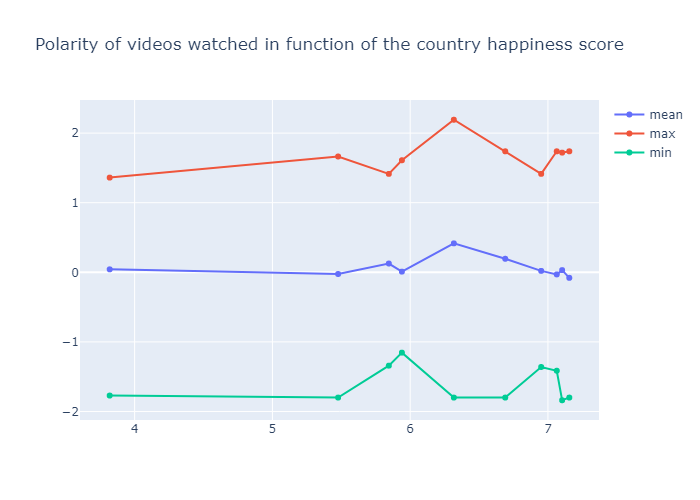

In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=df_by_country_mean['title.polarity'], x=df_by_country_min['happiness'],
                    mode='lines+markers',
                    name='mean'))
fig.add_trace(go.Scatter(y=df_by_country_max['title.polarity'], x=df_by_country_min['happiness'],
                    mode='lines+markers',
                    name='max'))
fig.add_trace(go.Scatter(y=df_by_country_min['title.polarity'], x=df_by_country_min['happiness'],
                    mode='lines+markers',
                    name='min'))

fig.update(layout_title_text='Polarity of videos watched in function of the country happiness score',
           layout_showlegend=True)
fig.show(renderer="png")